In [1]:
train_r = r'C:\Users\hp\intersala_project\train'
test_r = r'C:\Users\hp\intersala_project\test'
validation_r = r'C:\Users\hp\intersala_project\validation'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_gen = ImageDataGenerator(rescale=1./255)
data_test = ImageDataGenerator(rescale = 1./255)
data_train=data_gen.flow_from_directory(
    train_r,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [23]:
train_r

'C:\\Users\\hp\\intersala_project\\train'

In [4]:
data_test = data_gen.flow_from_directory(
    test_r,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [5]:
data_valid = data_gen.flow_from_directory(
    validation_r,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
models = models.Sequential()
models.add(layers.Conv2D(32, (3,3) , activation='relu' , input_shape = (150, 150, 3)))
models.add(layers.MaxPooling2D((2,2)))

models.add(layers.Conv2D(64, (3,3), activation='relu'))
models.add(layers.MaxPooling2D(2,2))

models.add(layers.Conv2D(128,(3,3), activation='relu'))
models.add(layers.MaxPooling2D((2,2)))

models.add(layers.Conv2D(128 , (3,3), activation = 'relu'))
models.add(layers.MaxPooling2D((2,2)))

models.add(layers.Flatten())

models.add(layers.Dense(300, activation = 'relu'))
models.add(layers.Dense(1 , activation='sigmoid'))

In [8]:
from tensorflow import keras

In [9]:
models.compile( optimizer = keras.optimizers.RMSprop(lr=1e-4) , loss = 'binary_crossentropy' , metrics = ['accuracy'] )

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
mmodel_history  = models.fit(
data_train,
    steps_per_epoch = 100,
    epochs = 10,
    validation_data = data_valid,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 68s 662ms/step - loss: 0.6960 - accuracy: 0.5305 - val_loss: 0.6785 - val_accuracy: 0.6110
Epoch 2/10
100/100 [==============================] - 1848s 19s/step - loss: 0.6632 - accuracy: 0.6070 - val_loss: 0.6718 - val_accuracy: 0.5570
Epoch 3/10
100/100 [==============================] - 66s 659ms/step - loss: 0.6211 - accuracy: 0.6665 - val_loss: 0.6280 - val_accuracy: 0.6430
Epoch 4/10
100/100 [==============================] - 67s 665ms/step - loss: 0.5791 - accuracy: 0.7060 - val_loss: 0.5985 - val_accuracy: 0.6740
Epoch 5/10
100/100 [==============================] - 74s 736ms/step - loss: 0.5533 - accuracy: 0.7095 - val_loss: 0.5906 - val_accuracy: 0.6850
Epoch 6/10
100/100 [==============================] - 76s 764ms/step - loss: 0.5225 - accuracy: 0.7420 - val_loss: 0.5694 - val_accuracy: 0.7040
Epoch 7/10
100/100 [==============================] - 77s 766ms/step - loss: 0.4954 - accuracy: 0.7635 - val_loss: 0.5860 - val_ac

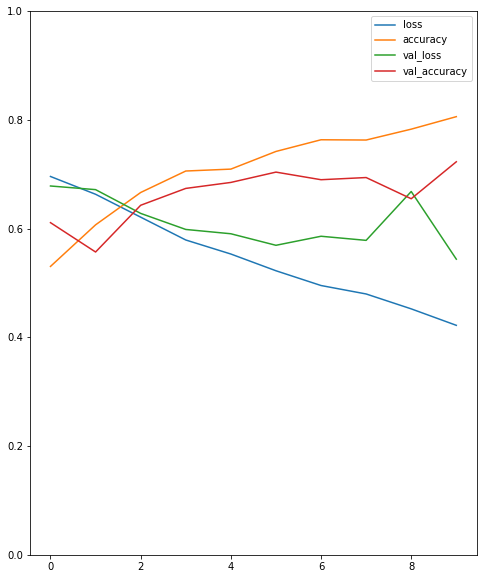

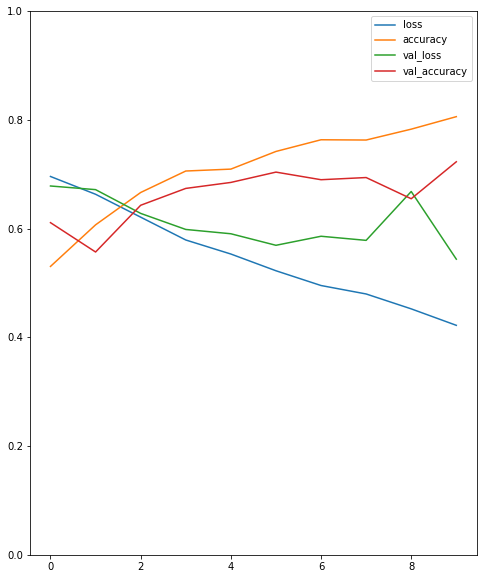

In [18]:
import pandas as pd
import matplotlib.pyplot as pt
%matplotlib inline
pd.DataFrame(mmodel_history.history).plot(figsize=(8,10))
pt.gca().set_ylim(0,1)
pt.show(0)

In [ ]:
#from tensorflow.keras import backend as k
#k.clear_session()
#del model

In [20]:
models.evaluate(data_test)

50/50 [==============================] - 14s 286ms/step - loss: 0.5353 - accuracy: 0.7350


[0.5353214144706726, 0.7350000143051147]

In [28]:
from tensorflow.keras import backend as k
k.clear_session()
del models

In [29]:
data_g=ImageDataGenerator(
rescale = 1./255,
rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [32]:
train = data_g.flow_from_directory(
train_r ,
    target_size = (150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
